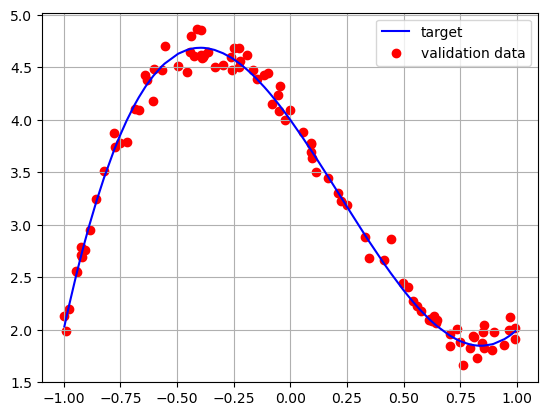

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9624 - mse: 1.9624 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.7306 - val_mse: 0.7306
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6109 - mse: 0.6109 - val_loss: 0.9850 - val_mse: 0.9850
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1165 - mse: 1.1165 - val_loss: 0.8723 - val_mse: 0.8723
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7695 - mse: 0.7695 - val_loss: 2.8814 - val_mse: 2.8814
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1638 - mse: 1.1638 - val_loss: 0.7794 - val_mse: 0.7794
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 0.7421 - val_mse: 0.7421
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9544 - mse: 0.9544 - val_loss: 0.9730 - val_mse: 0.9730
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

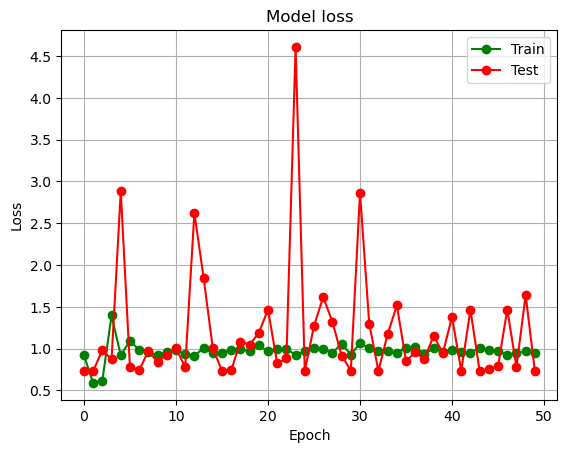

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


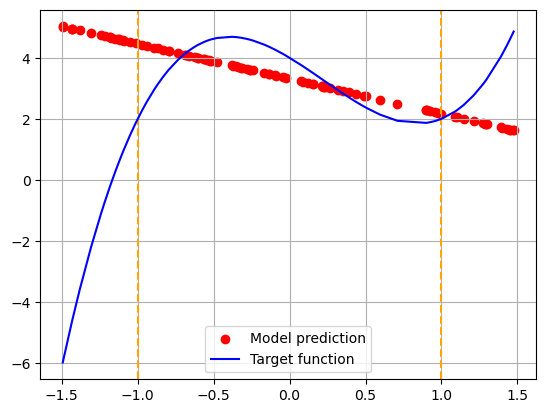

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4 - 3 *  x_valid - 2 *  x_valid *  x_valid + 3 *  x_valid *  x_valid * x_valid  # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train * x_train + 3 * x_train * x_train *x_train  , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid* x_valid , sigma)
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target', color='b')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#model.add(Dense(32, input_shape=(1,), activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1,))
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) 
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label= "Model prediction")
plt.axvline(1., color = 'orange', linestyle = '--')
plt.axvline(-1., color = 'orange', linestyle = '--')
x_predicted.sort()
y_target_ext = 4 - 3 *  x_predicted - 2 *  x_predicted *  x_predicted + 3 *  x_predicted *  x_predicted * x_predicted 
plt.plot(x_predicted, y_target_ext, color='b',label="Target function")
plt.grid(True)
plt.legend()
plt.show()